### Midterm Project
### Risk Prediction

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# import os and change directory
import os
os.chdir('D:\Academics\Humber\AIGC 5005 - Capstone Prep\Mid-term project')

In [3]:
# import train data
data = pd.read_csv('risk_training_data.csv')
data.head()

,ORDER_ID,CLASS,B_EMAIL,B_TELEFON,B_BIRTHDATE,FLAG_LRIDENTISCH,FLAG_NEWSLETTER,Z_METHODE,Z_CARD_ART,Z_CARD_VALID,...,FAIL_RPLZ,FAIL_RORT,FAIL_RPLZORTMATCH,SESSION_TIME,NEUKUNDE,AMOUNT_ORDER_PRE,VALUE_ORDER_PRE,DATE_LORDER,MAHN_AKT,MAHN_HOECHST
0,49917,no,yes,no,1/17/1973,yes,yes,check,?,5.2006,...,no,no,no,8,yes,0,0.00,?,?,?
1,49919,no,yes,yes,12/8/1970,no,no,credit_card,Visa,12.2007,...,yes,no,no,13,yes,0,0.00,?,?,?
2,49923,no,yes,no,4/3/1972,yes,no,check,?,12.2007,...,no,no,no,3,yes,0,0.00,?,?,?
3,49924,no,no,yes,8/1/1966,yes,no,check,?,1.2007,...,no,no,no,11,no,4,75.72,5/12/2002,0,0
4,49927,no,yes,yes,12/21/1969,yes,no,credit_card,Eurocard,12.2006,...,no,no,no,16,yes,0,0.00,?,?,?


In [4]:
# dimension of data
data.shape

(30000, 44)

In [5]:
# data informations
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ORDER_ID           30000 non-null  int64  
 1   CLASS              30000 non-null  object 
 2   B_EMAIL            30000 non-null  object 
 3   B_TELEFON          30000 non-null  object 
 4   B_BIRTHDATE        30000 non-null  object 
 5   FLAG_LRIDENTISCH   30000 non-null  object 
 6   FLAG_NEWSLETTER    30000 non-null  object 
 7   Z_METHODE          30000 non-null  object 
 8   Z_CARD_ART         30000 non-null  object 
 9   Z_CARD_VALID       30000 non-null  float64
 10  Z_LAST_NAME        30000 non-null  object 
 11  VALUE_ORDER        30000 non-null  float64
 12  WEEKDAY_ORDER      30000 non-null  object 
 13  TIME_ORDER         30000 non-null  object 
 14  AMOUNT_ORDER       30000 non-null  int64  
 15  ANUMMER_01         30000 non-null  int64  
 16  ANUMMER_02         300

Observations: there are many categorical features and few numerical features in the dataset

In [6]:
## key statistics of data
data.describe()

,ORDER_ID,Z_CARD_VALID,VALUE_ORDER,AMOUNT_ORDER,ANUMMER_01,SESSION_TIME,AMOUNT_ORDER_PRE,VALUE_ORDER_PRE
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,25032.612933,6.680567,43.968058,1.442200,331860.254033,8.577900,0.606700,29.875652
std,14422.306098,3.468332,35.709431,0.921496,147310.846584,3.863448,0.765616,57.382732
min,1.000000,1.200500,5.200000,1.000000,100061.000000,1.000000,0.000000,0.000000
25%,12518.750000,3.200700,17.990000,1.000000,204159.000000,6.000000,0.000000,0.000000
50%,25095.500000,6.200700,34.500000,1.000000,401241.000000,9.000000,0.000000,0.000000
75%,37520.250000,10.200500,57.800000,2.000000,407703.000000,11.000000,1.000000,38.470000
max,50000.000000,12.200700,361.200000,9.000000,609725.000000,24.000000,6.000000,1047.800000


In [7]:
## check missing values. we are not able to see missing values in dataset because of '?'
data.isnull().sum()

ORDER_ID             0
CLASS                0
B_EMAIL              0
B_TELEFON            0
B_BIRTHDATE          0
FLAG_LRIDENTISCH     0
FLAG_NEWSLETTER      0
Z_METHODE            0
Z_CARD_ART           0
Z_CARD_VALID         0
Z_LAST_NAME          0
VALUE_ORDER          0
WEEKDAY_ORDER        0
TIME_ORDER           0
AMOUNT_ORDER         0
ANUMMER_01           0
ANUMMER_02           0
ANUMMER_03           0
ANUMMER_04           0
ANUMMER_05           0
ANUMMER_06           0
ANUMMER_07           0
ANUMMER_08           0
ANUMMER_09           0
ANUMMER_10           0
CHK_LADR             0
CHK_RADR             0
CHK_KTO              0
CHK_CARD             0
CHK_COOKIE           0
CHK_IP               0
FAIL_LPLZ            0
FAIL_LORT            0
FAIL_LPLZORTMATCH    0
FAIL_RPLZ            0
FAIL_RORT            0
FAIL_RPLZORTMATCH    0
SESSION_TIME         0
NEUKUNDE             0
AMOUNT_ORDER_PRE     0
VALUE_ORDER_PRE      0
DATE_LORDER          0
MAHN_AKT             0
MAHN_HOECHS

#### replace '?' with np.nan and create new dataframe

In [8]:
# replace '?' with np.nan
df = data.replace('?',np.NAN) 
df.head()

,ORDER_ID,CLASS,B_EMAIL,B_TELEFON,B_BIRTHDATE,FLAG_LRIDENTISCH,FLAG_NEWSLETTER,Z_METHODE,Z_CARD_ART,Z_CARD_VALID,...,FAIL_RPLZ,FAIL_RORT,FAIL_RPLZORTMATCH,SESSION_TIME,NEUKUNDE,AMOUNT_ORDER_PRE,VALUE_ORDER_PRE,DATE_LORDER,MAHN_AKT,MAHN_HOECHST
0,49917,no,yes,no,1/17/1973,yes,yes,check,NaN,5.2006,...,no,no,no,8,yes,0,0.00,NaN,NaN,NaN
1,49919,no,yes,yes,12/8/1970,no,no,credit_card,Visa,12.2007,...,yes,no,no,13,yes,0,0.00,NaN,NaN,NaN
2,49923,no,yes,no,4/3/1972,yes,no,check,NaN,12.2007,...,no,no,no,3,yes,0,0.00,NaN,NaN,NaN
3,49924,no,no,yes,8/1/1966,yes,no,check,NaN,1.2007,...,no,no,no,11,no,4,75.72,5/12/2002,0,0
4,49927,no,yes,yes,12/21/1969,yes,no,credit_card,Eurocard,12.2006,...,no,no,no,16,yes,0,0.00,NaN,NaN,NaN


In [9]:
## now we are able to see missing values in dataset.
df.isnull().sum()

ORDER_ID                 0
CLASS                    0
B_EMAIL                  0
B_TELEFON                0
B_BIRTHDATE           2942
FLAG_LRIDENTISCH         0
FLAG_NEWSLETTER          0
Z_METHODE                0
Z_CARD_ART           18654
Z_CARD_VALID             0
Z_LAST_NAME          14808
VALUE_ORDER              0
WEEKDAY_ORDER            0
TIME_ORDER              20
AMOUNT_ORDER             0
ANUMMER_01               0
ANUMMER_02           22147
ANUMMER_03           26802
ANUMMER_04           28668
ANUMMER_05           29459
ANUMMER_06           29794
ANUMMER_07           29905
ANUMMER_08           29966
ANUMMER_09           29993
ANUMMER_10           30000
CHK_LADR                 0
CHK_RADR                 0
CHK_KTO                  0
CHK_CARD                 0
CHK_COOKIE               0
CHK_IP                   0
FAIL_LPLZ                0
FAIL_LORT                0
FAIL_LPLZORTMATCH        0
FAIL_RPLZ                0
FAIL_RORT                0
FAIL_RPLZORTMATCH        0
S

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ORDER_ID           30000 non-null  int64  
 1   CLASS              30000 non-null  object 
 2   B_EMAIL            30000 non-null  object 
 3   B_TELEFON          30000 non-null  object 
 4   B_BIRTHDATE        27058 non-null  object 
 5   FLAG_LRIDENTISCH   30000 non-null  object 
 6   FLAG_NEWSLETTER    30000 non-null  object 
 7   Z_METHODE          30000 non-null  object 
 8   Z_CARD_ART         11346 non-null  object 
 9   Z_CARD_VALID       30000 non-null  float64
 10  Z_LAST_NAME        15192 non-null  object 
 11  VALUE_ORDER        30000 non-null  float64
 12  WEEKDAY_ORDER      30000 non-null  object 
 13  TIME_ORDER         29980 non-null  object 
 14  AMOUNT_ORDER       30000 non-null  int64  
 15  ANUMMER_01         30000 non-null  int64  
 16  ANUMMER_02         785

### Drop features

In [11]:
df.iloc[:,15:25]

,ANUMMER_01,ANUMMER_02,ANUMMER_03,ANUMMER_04,ANUMMER_05,ANUMMER_06,ANUMMER_07,ANUMMER_08,ANUMMER_09,ANUMMER_10
0,406811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,600953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,406310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,307359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,200767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
29995,406859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29996,206507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29997,500767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29998,502611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
final_df = df.drop(df.iloc[:,15:25], axis=1)
final_df.head()

,ORDER_ID,CLASS,B_EMAIL,B_TELEFON,B_BIRTHDATE,FLAG_LRIDENTISCH,FLAG_NEWSLETTER,Z_METHODE,Z_CARD_ART,Z_CARD_VALID,...,FAIL_RPLZ,FAIL_RORT,FAIL_RPLZORTMATCH,SESSION_TIME,NEUKUNDE,AMOUNT_ORDER_PRE,VALUE_ORDER_PRE,DATE_LORDER,MAHN_AKT,MAHN_HOECHST
0,49917,no,yes,no,1/17/1973,yes,yes,check,NaN,5.2006,...,no,no,no,8,yes,0,0.00,NaN,NaN,NaN
1,49919,no,yes,yes,12/8/1970,no,no,credit_card,Visa,12.2007,...,yes,no,no,13,yes,0,0.00,NaN,NaN,NaN
2,49923,no,yes,no,4/3/1972,yes,no,check,NaN,12.2007,...,no,no,no,3,yes,0,0.00,NaN,NaN,NaN
3,49924,no,no,yes,8/1/1966,yes,no,check,NaN,1.2007,...,no,no,no,11,no,4,75.72,5/12/2002,0,0
4,49927,no,yes,yes,12/21/1969,yes,no,credit_card,Eurocard,12.2006,...,no,no,no,16,yes,0,0.00,NaN,NaN,NaN


In [13]:
final_df = final_df.drop(['DATE_LORDER','MAHN_AKT','MAHN_HOECHST'], axis=1 )
final_df.head()

,ORDER_ID,CLASS,B_EMAIL,B_TELEFON,B_BIRTHDATE,FLAG_LRIDENTISCH,FLAG_NEWSLETTER,Z_METHODE,Z_CARD_ART,Z_CARD_VALID,...,FAIL_LPLZ,FAIL_LORT,FAIL_LPLZORTMATCH,FAIL_RPLZ,FAIL_RORT,FAIL_RPLZORTMATCH,SESSION_TIME,NEUKUNDE,AMOUNT_ORDER_PRE,VALUE_ORDER_PRE
0,49917,no,yes,no,1/17/1973,yes,yes,check,NaN,5.2006,...,no,no,no,no,no,no,8,yes,0,0.00
1,49919,no,yes,yes,12/8/1970,no,no,credit_card,Visa,12.2007,...,no,no,no,yes,no,no,13,yes,0,0.00
2,49923,no,yes,no,4/3/1972,yes,no,check,NaN,12.2007,...,no,no,no,no,no,no,3,yes,0,0.00
3,49924,no,no,yes,8/1/1966,yes,no,check,NaN,1.2007,...,no,no,no,no,no,no,11,no,4,75.72
4,49927,no,yes,yes,12/21/1969,yes,no,credit_card,Eurocard,12.2006,...,no,no,no,no,no,no,16,yes,0,0.00


In [14]:
final_df.drop(['TIME_ORDER','B_BIRTHDATE'], axis=1, inplace=True)

In [15]:
final_df.shape

(30000, 29)

In [16]:
final_df.isnull().sum()

ORDER_ID                 0
CLASS                    0
B_EMAIL                  0
B_TELEFON                0
FLAG_LRIDENTISCH         0
FLAG_NEWSLETTER          0
Z_METHODE                0
Z_CARD_ART           18654
Z_CARD_VALID             0
Z_LAST_NAME          14808
VALUE_ORDER              0
WEEKDAY_ORDER            0
AMOUNT_ORDER             0
CHK_LADR                 0
CHK_RADR                 0
CHK_KTO                  0
CHK_CARD                 0
CHK_COOKIE               0
CHK_IP                   0
FAIL_LPLZ                0
FAIL_LORT                0
FAIL_LPLZORTMATCH        0
FAIL_RPLZ                0
FAIL_RORT                0
FAIL_RPLZORTMATCH        0
SESSION_TIME             0
NEUKUNDE                 0
AMOUNT_ORDER_PRE         0
VALUE_ORDER_PRE          0
dtype: int64

In [17]:
final_df.columns

Index(['ORDER_ID', 'CLASS', 'B_EMAIL', 'B_TELEFON', 'FLAG_LRIDENTISCH',
       'FLAG_NEWSLETTER', 'Z_METHODE', 'Z_CARD_ART', 'Z_CARD_VALID',
       'Z_LAST_NAME', 'VALUE_ORDER', 'WEEKDAY_ORDER', 'AMOUNT_ORDER',
       'CHK_LADR', 'CHK_RADR', 'CHK_KTO', 'CHK_CARD', 'CHK_COOKIE', 'CHK_IP',
       'FAIL_LPLZ', 'FAIL_LORT', 'FAIL_LPLZORTMATCH', 'FAIL_RPLZ', 'FAIL_RORT',
       'FAIL_RPLZORTMATCH', 'SESSION_TIME', 'NEUKUNDE', 'AMOUNT_ORDER_PRE',
       'VALUE_ORDER_PRE'],
      dtype='object')

In [18]:
final_df['FLAG_LRIDENTISCH'].value_counts()

yes    21157
no      8843
Name: FLAG_LRIDENTISCH, dtype: int64

In [19]:
final_df['CLASS'][final_df['FLAG_LRIDENTISCH'] == 'yes'].value_counts()

no     19916
yes     1241
Name: CLASS, dtype: int64

In [20]:
final_df['CLASS'].value_counts()

no     28254
yes     1746
Name: CLASS, dtype: int64

In [21]:
### null values present where paymet method is check
final_df['Z_CARD_ART'][final_df['Z_METHODE']=='check'].unique()

array([nan], dtype=object)

In [22]:
final_df['Z_CARD_ART'][final_df['Z_METHODE']=='debit_card'].unique()

array(['debit_card'], dtype=object)

In [23]:
final_df['Z_CARD_ART'][final_df['Z_METHODE']=='credit_card'].unique()

array(['Visa', 'Eurocard', 'Amex'], dtype=object)

In [24]:
final_df['Z_CARD_ART'].unique()

array([nan, 'Visa', 'Eurocard', 'debit_card', 'Amex'], dtype=object)

#### Z_METHOD : Selected method of payment
#### Z_CARD_ART: Selected type of card if payment by card is chosen

#### Observation: we see many null values in 'Z_CARD_ART' columns because payment is done by check and debit_note.

In [25]:
final_df['Z_CARD_ART'].isnull().sum()

18654

In [26]:
### there is also high risk when payment method is check
final_df['CLASS'][final_df['Z_METHODE']=='check'].value_counts()

no     13832
yes      976
Name: CLASS, dtype: int64

In [27]:
# 14808 customer paid using check

In [28]:
## search 'Z_CARD_ART'
final_df['Z_CARD_ART'][final_df['Z_METHODE'].isin(['check', 'credit_card', 'debit_note', 'debit_card'])]

0             NaN
1            Visa
2             NaN
3             NaN
4        Eurocard
           ...   
29995         NaN
29996    Eurocard
29997    Eurocard
29998        Visa
29999    Eurocard
Name: Z_CARD_ART, Length: 30000, dtype: object

In [29]:
final_df['Z_CARD_ART'][final_df['Z_METHODE'].isin(['check', 'credit_card', 'debit_note', 'debit_card'])].value_counts()

Eurocard      5096
Visa          3927
debit_card    1550
Amex           773
Name: Z_CARD_ART, dtype: int64

In [30]:
final_df['Z_CARD_ART'][~final_df['Z_METHODE'].isin(['check', 'credit_card', 'debit_note', 'debit_card'])]

Series([], Name: Z_CARD_ART, dtype: object)

### Fill null values in Z_CARD_ART column. Null values presents in thoes records where customer pay be check and debit_note. fill null values by 'check' in thoes records where payment method is check and by 'Eurocard' where payment method is debit_note. because most people use credit card which is Eurocard

In [31]:
final_df.loc[final_df['Z_METHODE'] == 'check', 'Z_CARD_ART'] 

0        NaN
2        NaN
3        NaN
6        NaN
7        NaN
        ... 
29986    NaN
29988    NaN
29989    NaN
29994    NaN
29995    NaN
Name: Z_CARD_ART, Length: 14808, dtype: object

In [32]:
final_df['Z_CARD_ART'].loc[final_df['Z_METHODE'] == 'check'] 

0        NaN
2        NaN
3        NaN
6        NaN
7        NaN
        ... 
29986    NaN
29988    NaN
29989    NaN
29994    NaN
29995    NaN
Name: Z_CARD_ART, Length: 14808, dtype: object

In [33]:
final_df.loc[final_df['Z_METHODE'] == 'check', 'Z_CARD_ART'] = final_df.loc[final_df['Z_METHODE'] == 'check', 'Z_CARD_ART'].fillna('check')

In [34]:
##  the remaining null values in Z_CARD_ART columns
final_df['Z_CARD_ART'].isnull().sum()

3846

In [35]:
## the remaining null values in Z_CARD_ART columns are fill by 'Eurocard'
final_df['Z_CARD_ART'] = final_df['Z_CARD_ART'].fillna('Eurocard')

In [36]:
final_df['Z_CARD_ART'].isnull().sum()

0

In [37]:
final_df.groupby(['Z_METHODE','CLASS']).size()

Z_METHODE    CLASS
check        no       13832
             yes        976
credit_card  no        9268
             yes        528
debit_card   no        1531
             yes         19
debit_note   no        3623
             yes        223
dtype: int64

Obesrvation: When customer use debit card then there is minimum high risk

### Handle missing values in Z_LAST_NAME columns using mode


In [38]:
final_df['Z_LAST_NAME'].mode()[0]

'yes'

In [39]:
### fill missing  value using mode
final_df['Z_LAST_NAME'] = final_df['Z_LAST_NAME'].fillna(final_df['Z_LAST_NAME'].mode()[0])

In [40]:
final_df['Z_LAST_NAME'].value_counts()

yes    29245
no       755
Name: Z_LAST_NAME, dtype: int64

In [41]:
final_df['Z_LAST_NAME'].isnull().sum()

0

In [42]:
# handle all null values in dataset
final_df.isnull().sum()

ORDER_ID             0
CLASS                0
B_EMAIL              0
B_TELEFON            0
FLAG_LRIDENTISCH     0
FLAG_NEWSLETTER      0
Z_METHODE            0
Z_CARD_ART           0
Z_CARD_VALID         0
Z_LAST_NAME          0
VALUE_ORDER          0
WEEKDAY_ORDER        0
AMOUNT_ORDER         0
CHK_LADR             0
CHK_RADR             0
CHK_KTO              0
CHK_CARD             0
CHK_COOKIE           0
CHK_IP               0
FAIL_LPLZ            0
FAIL_LORT            0
FAIL_LPLZORTMATCH    0
FAIL_RPLZ            0
FAIL_RORT            0
FAIL_RPLZORTMATCH    0
SESSION_TIME         0
NEUKUNDE             0
AMOUNT_ORDER_PRE     0
VALUE_ORDER_PRE      0
dtype: int64

### Mapping (yes:1 , no: 0)

In [43]:
categorical_data = [features for features in final_df.columns if final_df[features].dtypes == 'O']
categorical_data

['CLASS',
 'B_EMAIL',
 'B_TELEFON',
 'FLAG_LRIDENTISCH',
 'FLAG_NEWSLETTER',
 'Z_METHODE',
 'Z_CARD_ART',
 'Z_LAST_NAME',
 'WEEKDAY_ORDER',
 'CHK_LADR',
 'CHK_RADR',
 'CHK_KTO',
 'CHK_CARD',
 'CHK_COOKIE',
 'CHK_IP',
 'FAIL_LPLZ',
 'FAIL_LORT',
 'FAIL_LPLZORTMATCH',
 'FAIL_RPLZ',
 'FAIL_RORT',
 'FAIL_RPLZORTMATCH',
 'NEUKUNDE']

In [44]:
final_df['B_EMAIL'] = final_df['B_EMAIL'].map({'yes':1, 'no':0})

In [45]:
final_df['B_TELEFON'] = final_df['B_TELEFON'].map({'yes':1, 'no':0})

In [46]:
final_df['FLAG_LRIDENTISCH'] = final_df['FLAG_LRIDENTISCH'].map({'yes':1, 'no':0})

In [47]:
final_df['FLAG_NEWSLETTER'] = final_df['FLAG_NEWSLETTER'].map({'yes':1, 'no':0})

In [48]:
final_df['FAIL_LPLZ'] = final_df['FAIL_LPLZ'].map({'yes':1, 'no':0})

In [49]:
final_df['FAIL_LORT'] = final_df['FAIL_LORT'].map({'yes':1, 'no':0})

In [50]:
final_df['FAIL_LPLZORTMATCH'] = final_df['FAIL_LPLZORTMATCH'].map({'yes':1, 'no':0})

In [51]:
final_df['FAIL_RPLZ'] = final_df['FAIL_RPLZ'].map({'yes':1, 'no':0})

In [52]:
final_df['FAIL_RORT'] = final_df['FAIL_RORT'].map({'yes':1, 'no':0})

In [53]:
final_df['FAIL_RPLZORTMATCH'] = final_df['FAIL_RPLZORTMATCH'].map({'yes':1, 'no':0})

In [54]:
final_df['NEUKUNDE'] = final_df['NEUKUNDE'].map({'yes':1, 'no':0})

In [55]:
final_df['CHK_LADR'] = final_df['CHK_LADR'].map({'yes':1, 'no':0})

In [56]:
final_df['CHK_RADR'] = final_df['CHK_RADR'].map({'yes':1, 'no':0})

In [57]:
final_df['Z_LAST_NAME'] = final_df['Z_LAST_NAME'].map({'yes':1, 'no':0})

In [58]:
final_df['CHK_KTO'] = final_df['CHK_KTO'].map({'yes':1, 'no':0})

In [59]:
final_df['CHK_CARD'] = final_df['CHK_CARD'].map({'yes':1, 'no':0})

In [60]:
final_df['CHK_COOKIE'] = final_df['CHK_COOKIE'].map({'yes':1, 'no':0})

In [61]:
final_df['CHK_IP'] = final_df['CHK_IP'].map({'yes':1, 'no':0})

In [62]:
categorical_data = [features for features in final_df.columns if final_df[features].dtypes == 'O']
categorical_data

['CLASS', 'Z_METHODE', 'Z_CARD_ART', 'WEEKDAY_ORDER']

In [63]:
final_df.head()

,ORDER_ID,CLASS,B_EMAIL,B_TELEFON,FLAG_LRIDENTISCH,FLAG_NEWSLETTER,Z_METHODE,Z_CARD_ART,Z_CARD_VALID,Z_LAST_NAME,...,FAIL_LPLZ,FAIL_LORT,FAIL_LPLZORTMATCH,FAIL_RPLZ,FAIL_RORT,FAIL_RPLZORTMATCH,SESSION_TIME,NEUKUNDE,AMOUNT_ORDER_PRE,VALUE_ORDER_PRE
0,49917,no,1,0,1,1,check,check,5.2006,1,...,0,0,0,0,0,0,8,1,0,0.00
1,49919,no,1,1,0,0,credit_card,Visa,12.2007,1,...,0,0,0,1,0,0,13,1,0,0.00
2,49923,no,1,0,1,0,check,check,12.2007,1,...,0,0,0,0,0,0,3,1,0,0.00
3,49924,no,0,1,1,0,check,check,1.2007,1,...,0,0,0,0,0,0,11,0,4,75.72
4,49927,no,1,1,1,0,credit_card,Eurocard,12.2006,1,...,0,0,0,0,0,0,16,1,0,0.00


### Feature Encoding
Label Encoding on WEEKDAY_ORDER and Onehot Encoding on 'Z_METHODE' and 'Z_CARD_ART' columns

In [65]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
final_df['WEEKDAY_ORDER'] = lb.fit_transform(final_df['WEEKDAY_ORDER'])

In [66]:
final_df['WEEKDAY_ORDER'].dtypes

dtype('int32')

In [67]:
final_df.head()

,ORDER_ID,CLASS,B_EMAIL,B_TELEFON,FLAG_LRIDENTISCH,FLAG_NEWSLETTER,Z_METHODE,Z_CARD_ART,Z_CARD_VALID,Z_LAST_NAME,...,FAIL_LPLZ,FAIL_LORT,FAIL_LPLZORTMATCH,FAIL_RPLZ,FAIL_RORT,FAIL_RPLZORTMATCH,SESSION_TIME,NEUKUNDE,AMOUNT_ORDER_PRE,VALUE_ORDER_PRE
0,49917,no,1,0,1,1,check,check,5.2006,1,...,0,0,0,0,0,0,8,1,0,0.00
1,49919,no,1,1,0,0,credit_card,Visa,12.2007,1,...,0,0,0,1,0,0,13,1,0,0.00
2,49923,no,1,0,1,0,check,check,12.2007,1,...,0,0,0,0,0,0,3,1,0,0.00
3,49924,no,0,1,1,0,check,check,1.2007,1,...,0,0,0,0,0,0,11,0,4,75.72
4,49927,no,1,1,1,0,credit_card,Eurocard,12.2006,1,...,0,0,0,0,0,0,16,1,0,0.00


In [68]:
final_df.shape

(30000, 29)

In [69]:
final_df = pd.get_dummies(final_df, columns=['Z_METHODE','Z_CARD_ART'], drop_first=True)
final_df

,ORDER_ID,CLASS,B_EMAIL,B_TELEFON,FLAG_LRIDENTISCH,FLAG_NEWSLETTER,Z_CARD_VALID,Z_LAST_NAME,VALUE_ORDER,WEEKDAY_ORDER,...,NEUKUNDE,AMOUNT_ORDER_PRE,VALUE_ORDER_PRE,Z_METHODE_credit_card,Z_METHODE_debit_card,Z_METHODE_debit_note,Z_CARD_ART_Eurocard,Z_CARD_ART_Visa,Z_CARD_ART_check,Z_CARD_ART_debit_card
0,49917,no,1,0,1,1,5.2006,1,17.80,2,...,1,0,0.00,0,0,0,0,0,1,0
1,49919,no,1,1,0,0,12.2007,1,18.20,6,...,1,0,0.00,1,0,0,0,1,0,0
2,49923,no,1,0,1,0,12.2007,1,10.80,0,...,1,0,0.00,0,0,0,0,0,1,0
3,49924,no,0,1,1,0,1.2007,1,54.50,0,...,0,4,75.72,0,0,0,0,0,1,0
4,49927,no,1,1,1,0,12.2006,1,19.99,5,...,1,0,0.00,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,49821,no,1,0,1,0,6.2005,1,18.20,3,...,0,1,40.83,0,0,0,0,0,1,0
29996,49824,no,1,0,0,0,5.2005,1,12.60,2,...,0,2,52.84,1,0,0,1,0,0,0
29997,49825,no,1,0,0,0,11.2006,1,32.80,1,...,1,0,0.00,1,0,0,1,0,0,0
29998,49828,no,1,0,0,0,4.2005,1,5.20,3,...,0,1,42.92,1,0,0,0,1,0,0


### Data Analysis

In [214]:
corr = final_df.corr()
corr

,ORDER_ID,B_EMAIL,B_TELEFON,FLAG_LRIDENTISCH,FLAG_NEWSLETTER,Z_CARD_VALID,Z_LAST_NAME,VALUE_ORDER,WEEKDAY_ORDER,AMOUNT_ORDER,...,FAIL_LPLZ,FAIL_LORT,FAIL_LPLZORTMATCH,FAIL_RPLZ,FAIL_RORT,FAIL_RPLZORTMATCH,SESSION_TIME,NEUKUNDE,AMOUNT_ORDER_PRE,VALUE_ORDER_PRE
ORDER_ID,1.000000,0.001645,-0.000491,-0.004138,0.004741,-0.001993,-0.000323,-0.004316,0.001349,0.000848,...,-0.004354,-0.005302,-0.007886,0.000762,0.000321,0.004936,-0.003121,0.000571,-0.000886,0.004823
B_EMAIL,0.001645,1.000000,-0.015833,-0.004104,0.103694,-0.002863,-0.007395,-0.000407,0.009124,-0.001844,...,0.005850,0.003978,0.001801,-0.001121,-0.000183,-0.007568,-0.001705,0.006309,-0.007097,0.001656
B_TELEFON,-0.000491,-0.015833,1.000000,0.001947,0.009188,0.010566,0.009784,0.006912,0.001538,0.003038,...,-0.003517,0.001733,-0.003495,-0.001778,0.009157,0.002957,-0.009360,-0.000990,-0.000292,-0.007682
FLAG_LRIDENTISCH,-0.004138,-0.004104,0.001947,1.000000,0.008846,0.002389,0.101031,-0.009573,0.010142,-0.014331,...,0.001618,0.012924,0.001858,-0.004870,0.002538,-0.006687,-0.008073,0.031573,0.004588,0.004783
FLAG_NEWSLETTER,0.004741,0.103694,0.009188,0.008846,1.000000,-0.010303,-0.005473,0.006057,-0.001423,-0.001099,...,-0.008539,0.004324,-0.004519,-0.000559,-0.002619,-0.005938,0.002932,-0.002460,0.000653,0.000732
Z_CARD_VALID,-0.001993,-0.002863,0.010566,0.002389,-0.010303,1.000000,0.001496,0.000474,-0.003303,-0.000461,...,-0.006263,-0.002509,-0.001044,0.004962,0.006938,-0.000020,0.000527,0.001598,-0.001241,-0.012250
Z_LAST_NAME,-0.000323,-0.007395,0.009784,0.101031,-0.005473,0.001496,1.000000,-0.038192,0.002048,-0.038600,...,-0.002439,0.005414,-0.005543,-0.001633,0.005765,-0.001683,0.006242,0.008643,-0.005265,0.001274
VALUE_ORDER,-0.004316,-0.000407,0.006912,-0.009573,0.006057,0.000474,-0.038192,1.000000,-0.001002,0.792516,...,0.005592,-0.005354,0.003040,-0.002161,0.004088,-0.002735,0.016891,-0.017035,0.006140,-0.005045
WEEKDAY_ORDER,0.001349,0.009124,0.001538,0.010142,-0.001423,-0.003303,0.002048,-0.001002,1.000000,0.002834,...,-0.005310,0.002359,0.006391,-0.000331,-0.002928,-0.004085,-0.005967,0.006054,-0.009402,-0.007463
AMOUNT_ORDER,0.000848,-0.001844,0.003038,-0.014331,-0.001099,-0.000461,-0.038600,0.792516,0.002834,1.000000,...,0.004420,0.000116,0.000491,-0.003195,-0.000272,-0.003811,0.014331,-0.013540,0.005553,-0.003536


<AxesSubplot:>

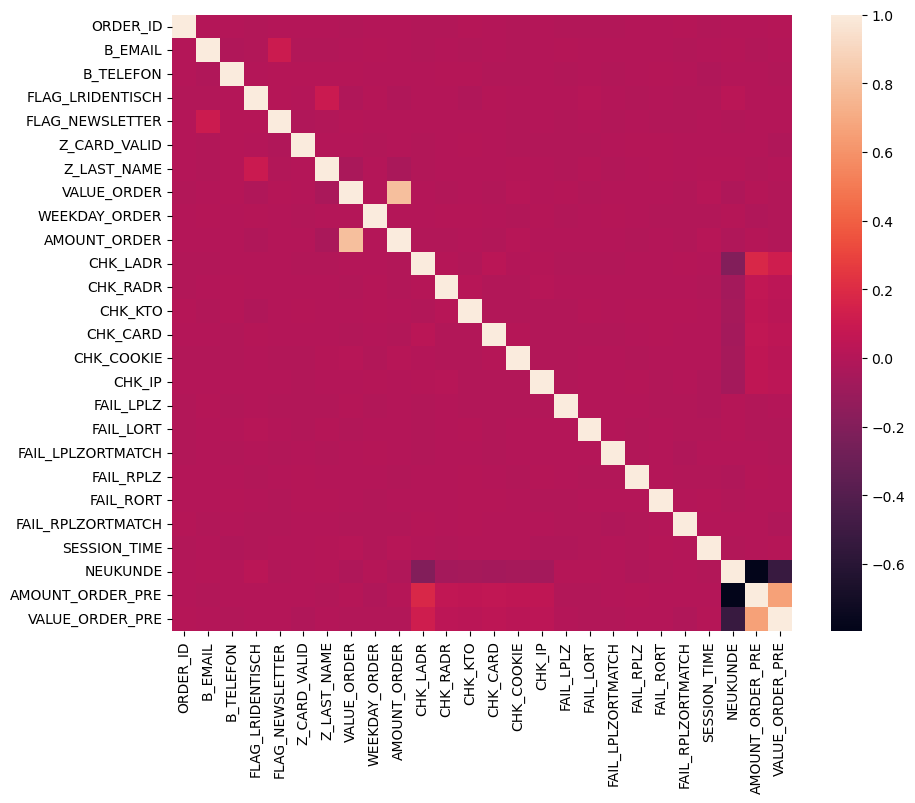

In [216]:
plt.figure(figsize=(10,8))
sns.heatmap(corr)

In [72]:
final_df['CLASS'].value_counts()

no     28254
yes     1746
Name: CLASS, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CLASS', ylabel='count'>

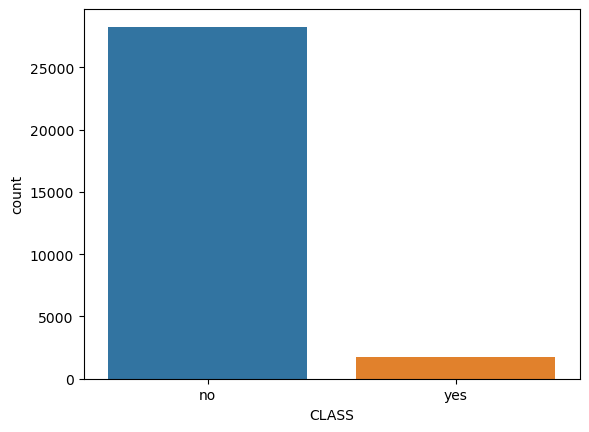

In [73]:
sns.countplot(final_df['CLASS'])

We have data imbalance in 'CLASS' column. no mean low risk, yes mean high risk. the data shows the low risks for most records.

C:\Users\dhvan\AppData\Local\Temp\ipykernel_19080\163889435.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots()


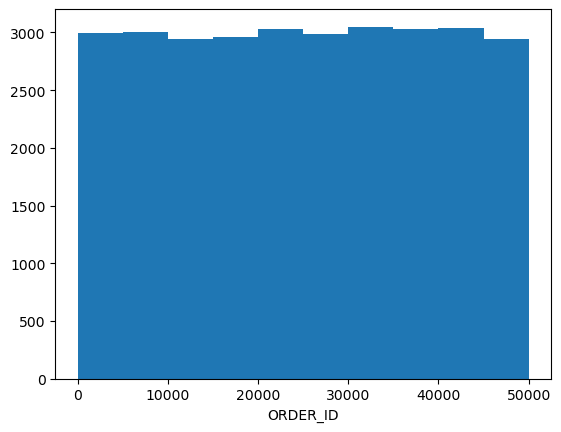

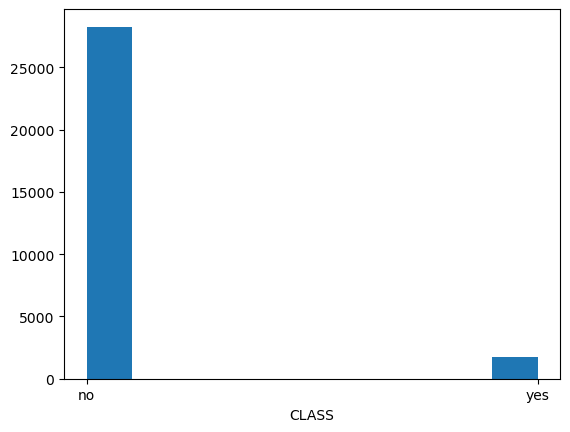

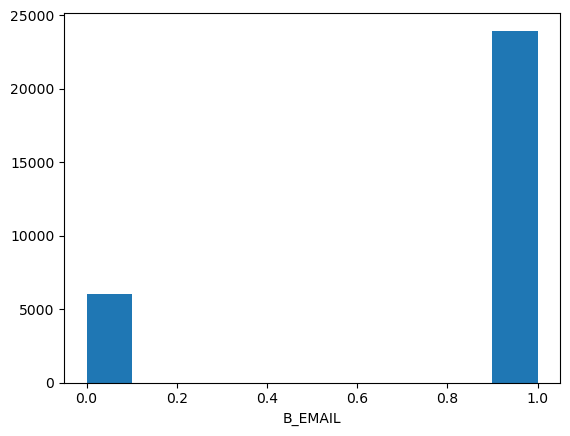

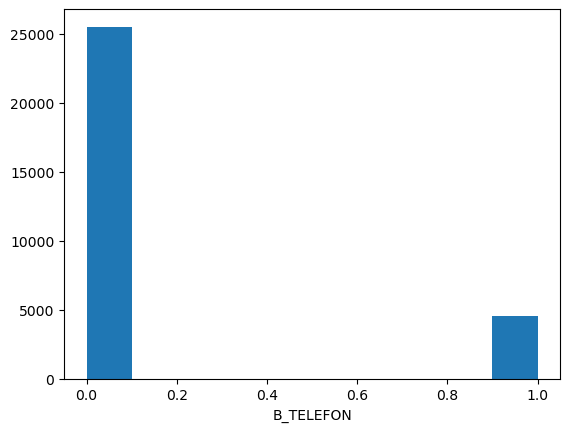

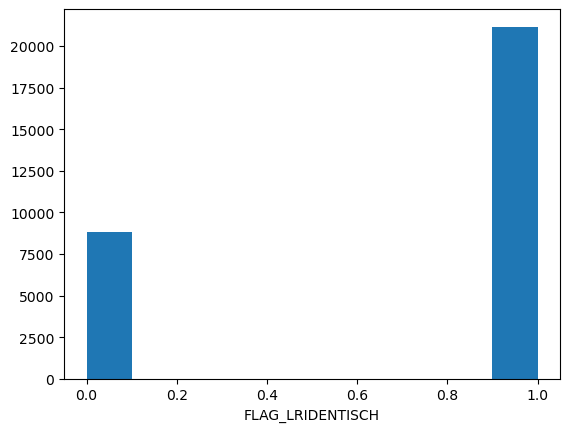

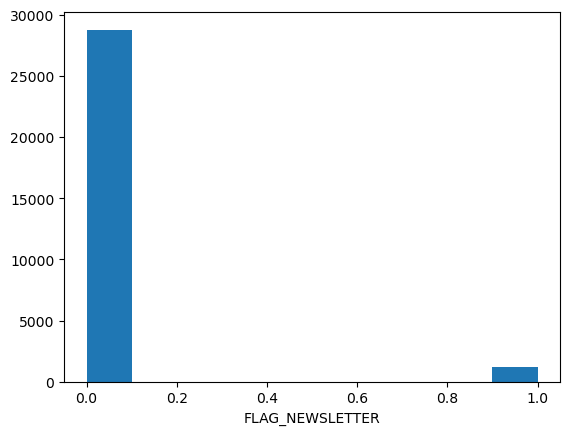

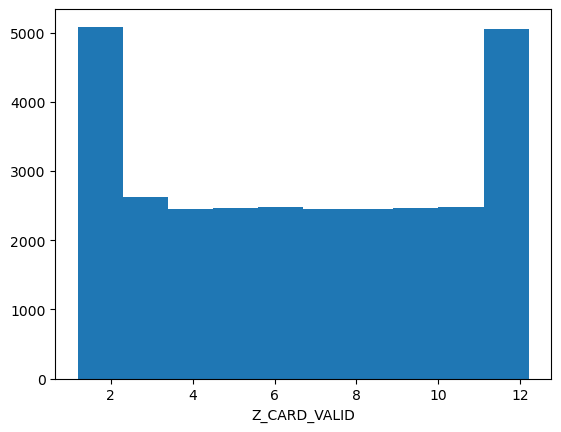

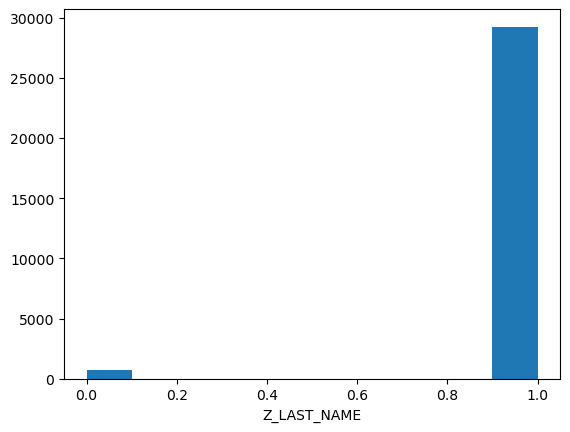

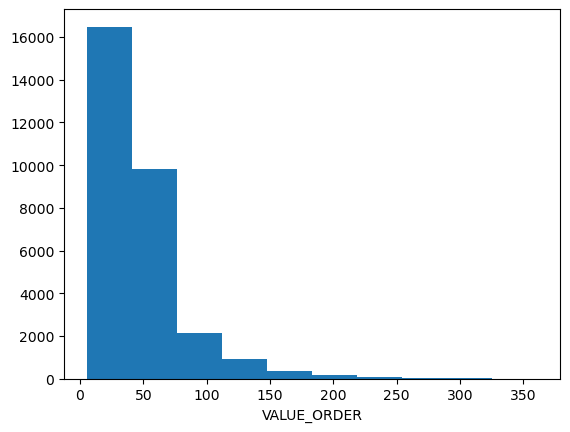

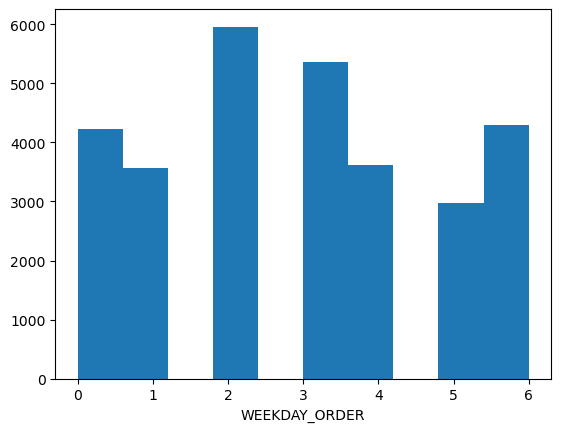

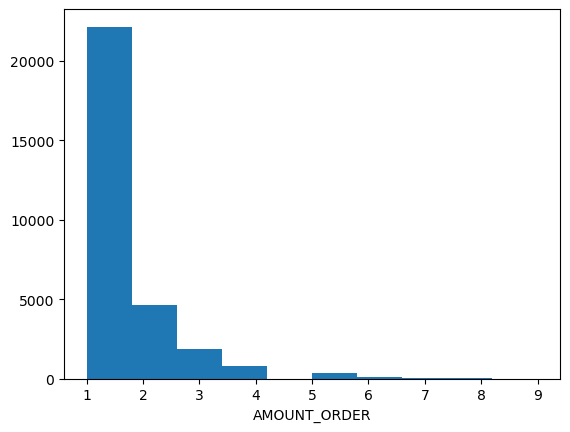

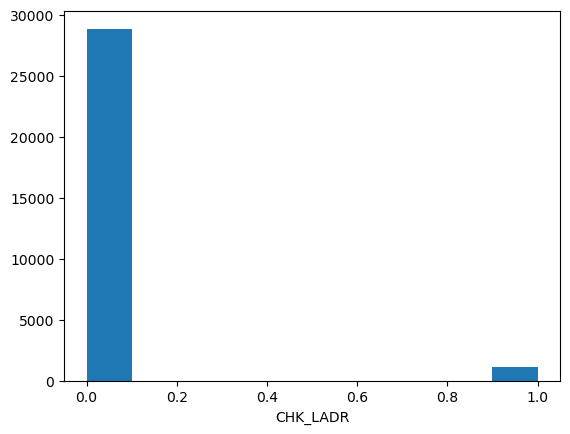

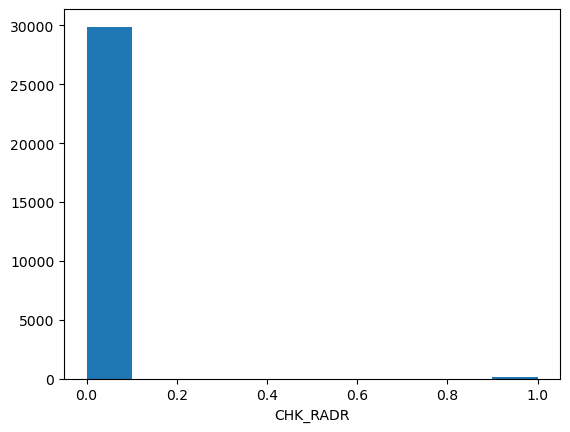

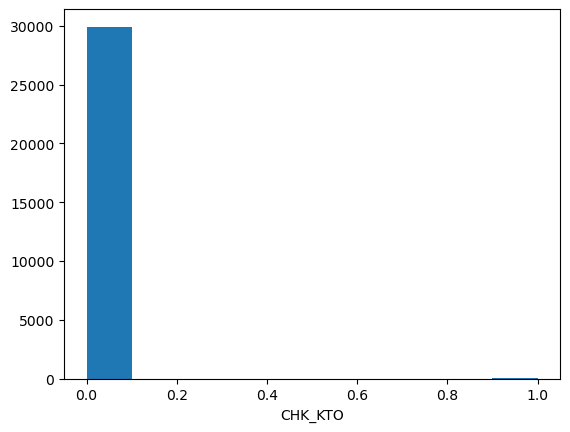

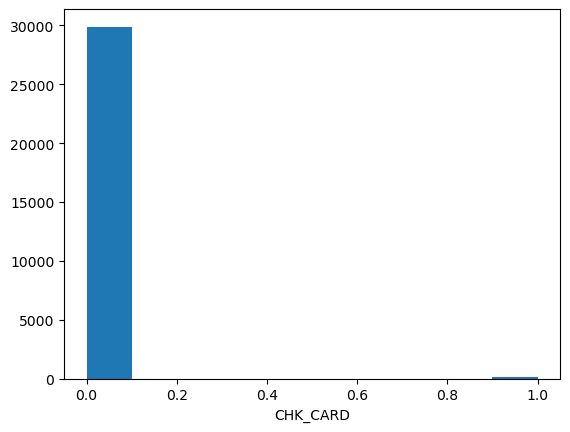

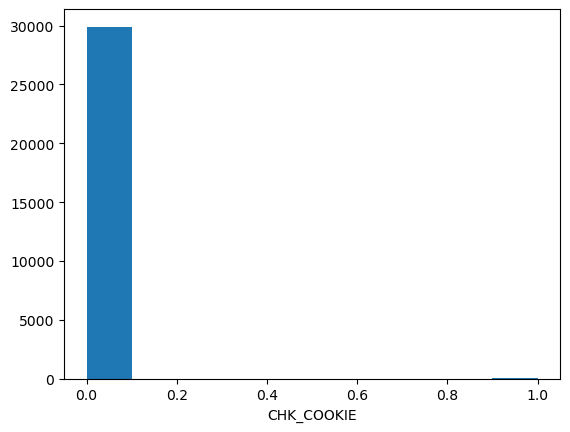

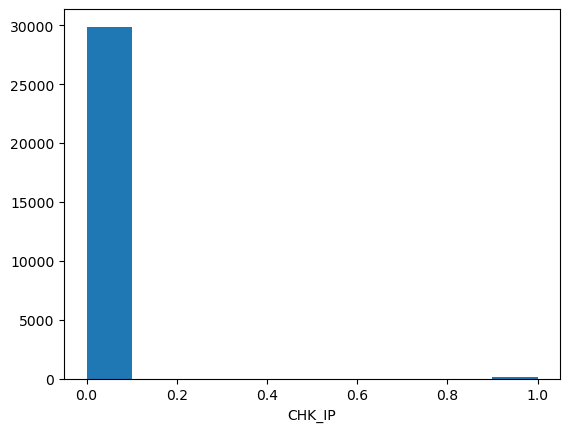

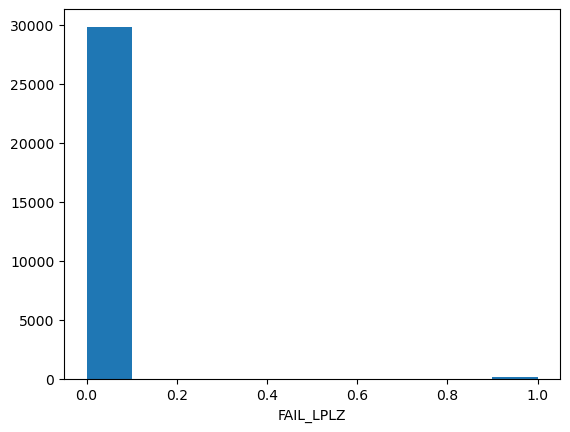

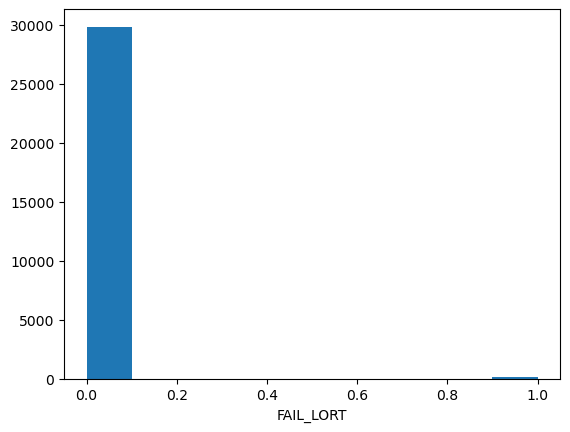

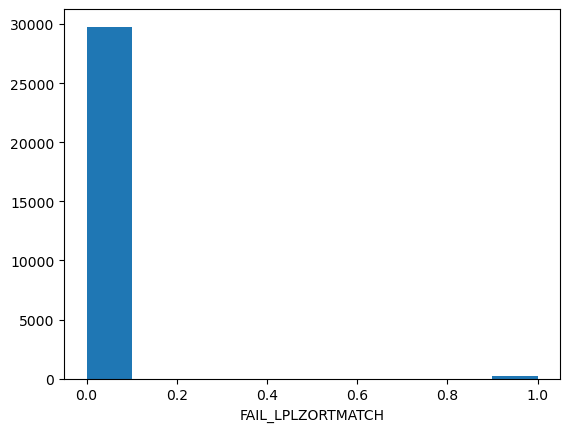

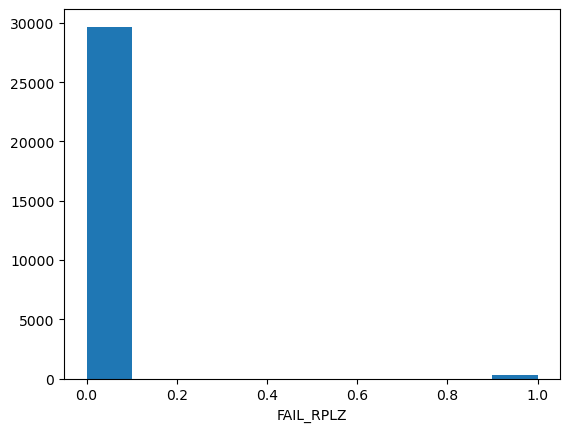

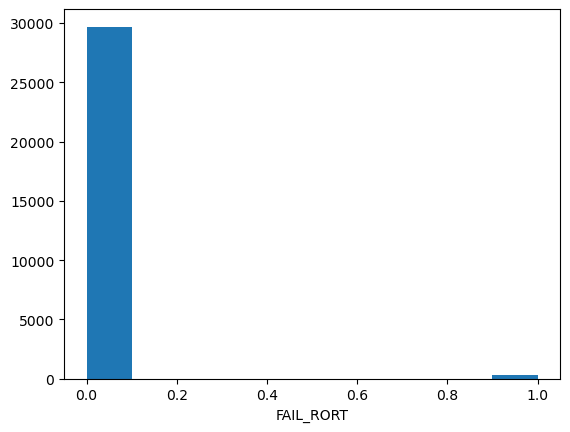

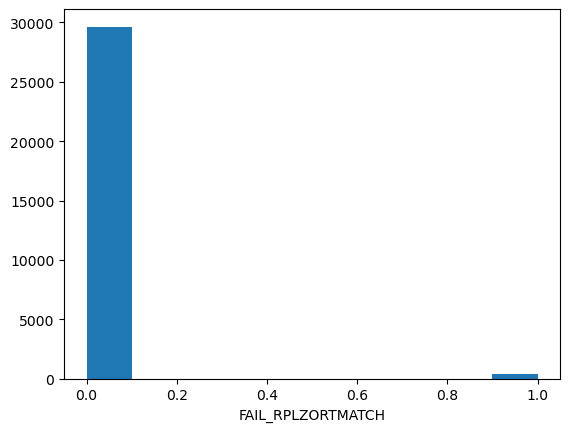

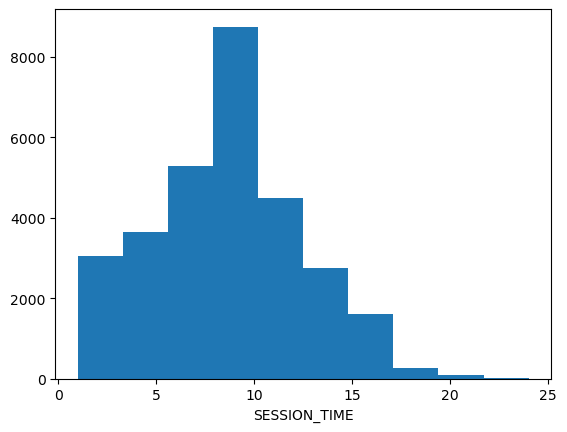

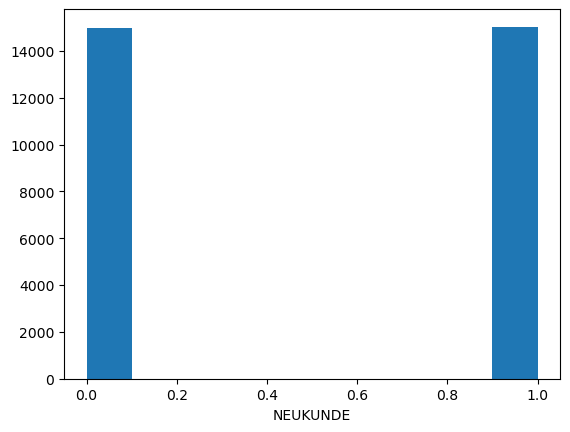

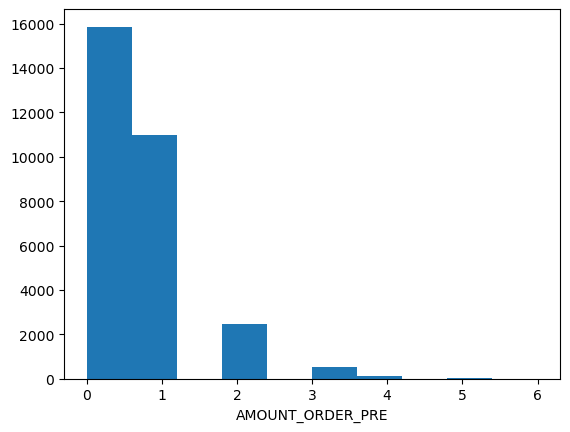

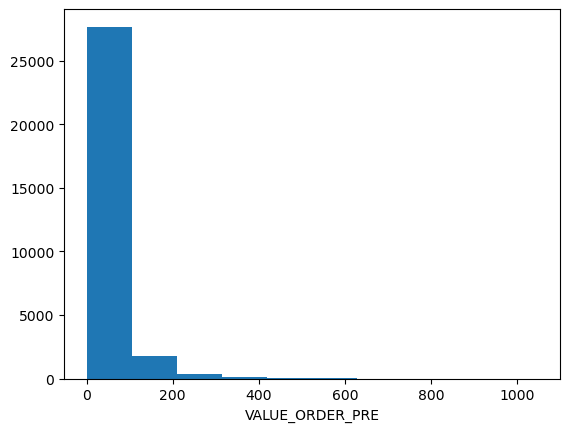

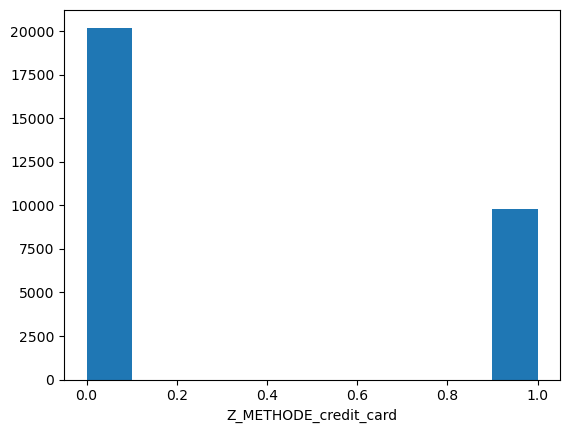

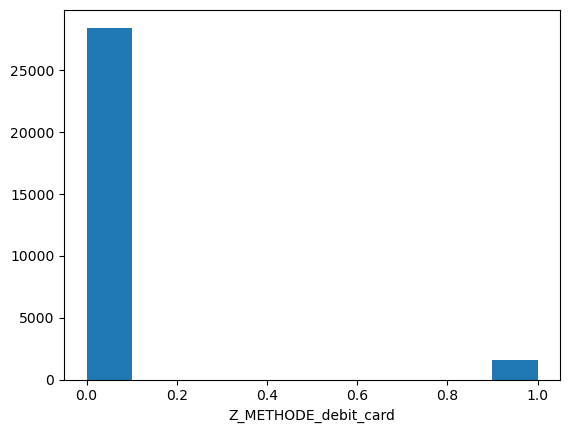

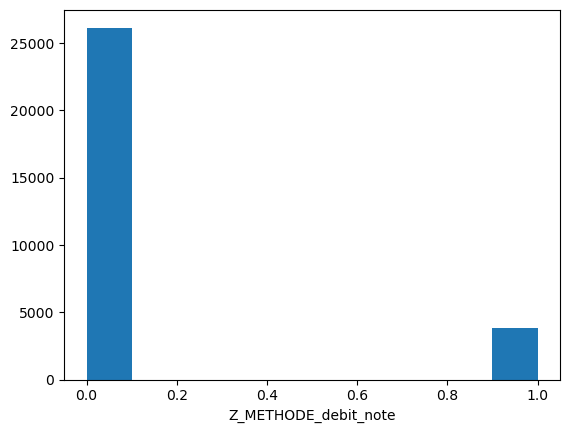

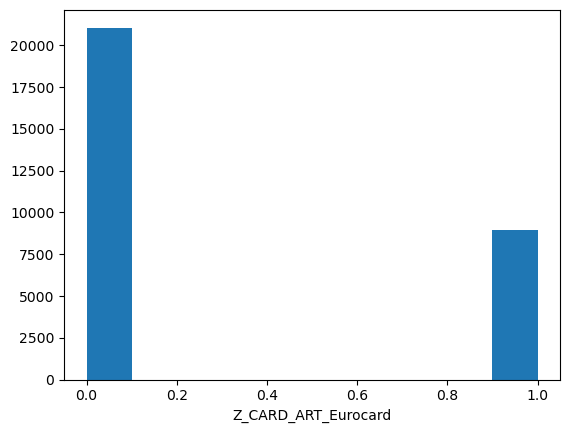

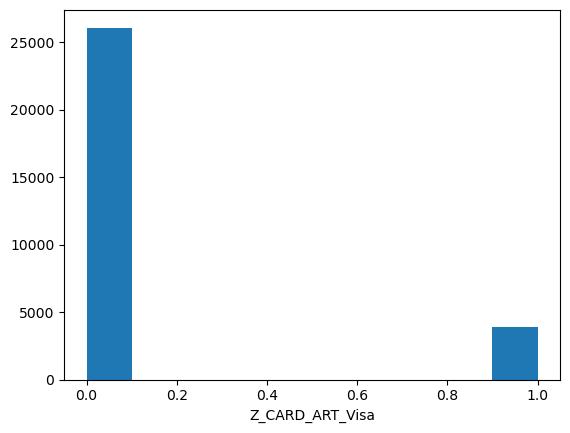

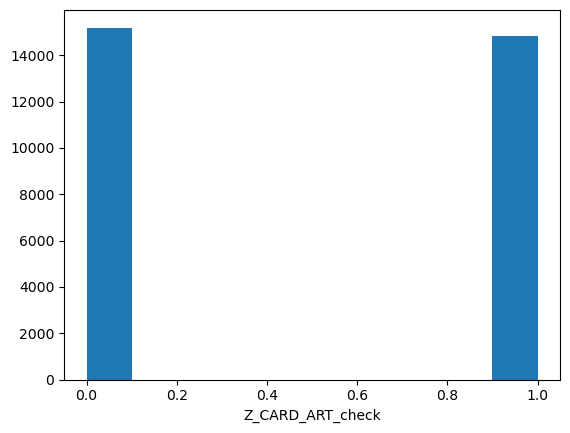

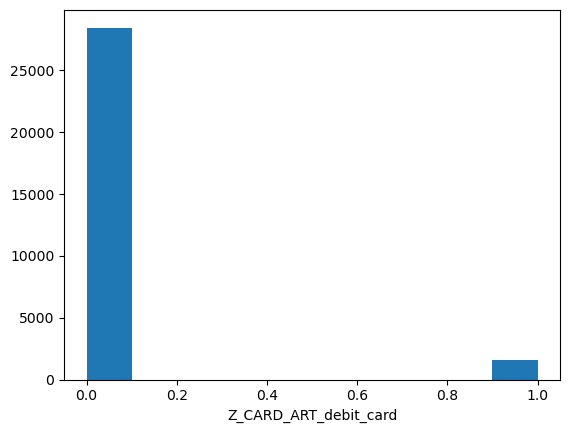

In [401]:
for col in final_df.columns:
    fig, axes = plt.subplots()
    
    axes.hist(final_df[col])
    axes.set_xlabel(col)

In [403]:
cols = final_df[['VALUE_ORDER', 'AMOUNT_ORDER', 'SESSION_TIME','AMOUNT_ORDER_PRE','VALUE_ORDER_PRE']]

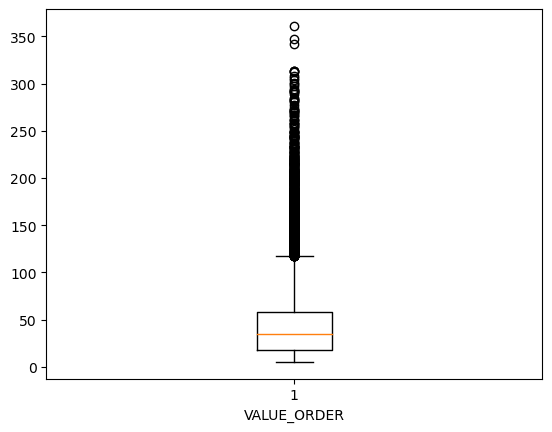

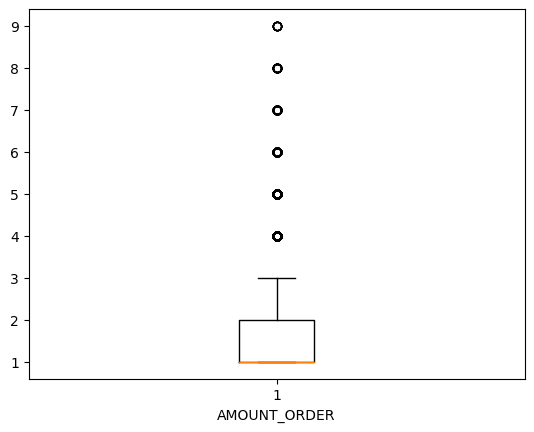

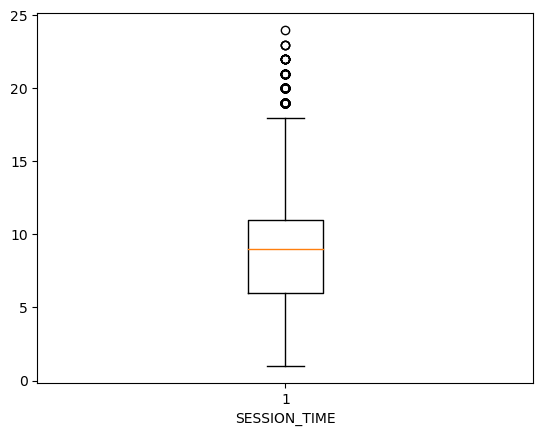

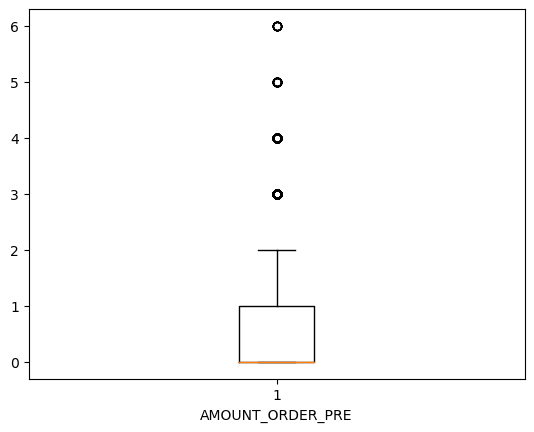

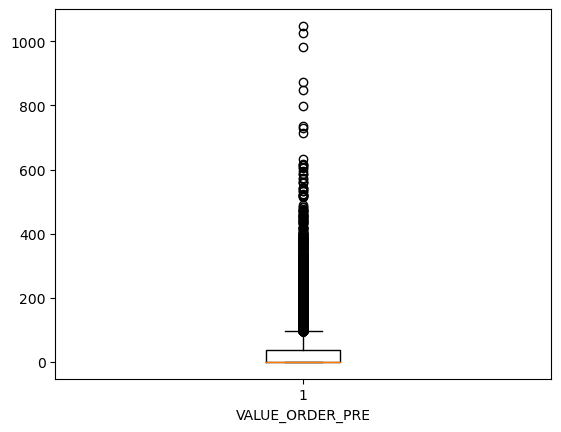

In [404]:
for col in cols.columns:
    fig, axes = plt.subplots()
    
    axes.boxplot(cols[col])
    axes.set_xlabel(col)

Observations: variables 'VALUE_ORDER', 'AMOUNT_ORDER', 'SESSON_TIME','AMOUNT_ORDER_PRE' 'VALUE_ORDER_PRE' has many outliers. Because of this ouliers these varibales are right skewed.

In [74]:
final_df[['VALUE_ORDER', 'AMOUNT_ORDER', 'SESSION_TIME','AMOUNT_ORDER_PRE','VALUE_ORDER_PRE']]

,VALUE_ORDER,AMOUNT_ORDER,SESSION_TIME,AMOUNT_ORDER_PRE,VALUE_ORDER_PRE
0,17.80,1,8,0,0.00
1,18.20,1,13,0,0.00
2,10.80,1,3,0,0.00
3,54.50,1,11,4,75.72
4,19.99,1,16,0,0.00
...,...,...,...,...,...
29995,18.20,1,10,1,40.83
29996,12.60,1,10,2,52.84
29997,32.80,1,6,0,0.00
29998,5.20,1,6,1,42.92


### Feature Selection using mutual_info_classif

In [222]:
X = final_df.drop('CLASS', axis=1)
y = final_df['CLASS']

In [221]:
from sklearn.feature_selection import mutual_info_classif

In [236]:
importance = mutual_info_classif(X,y)

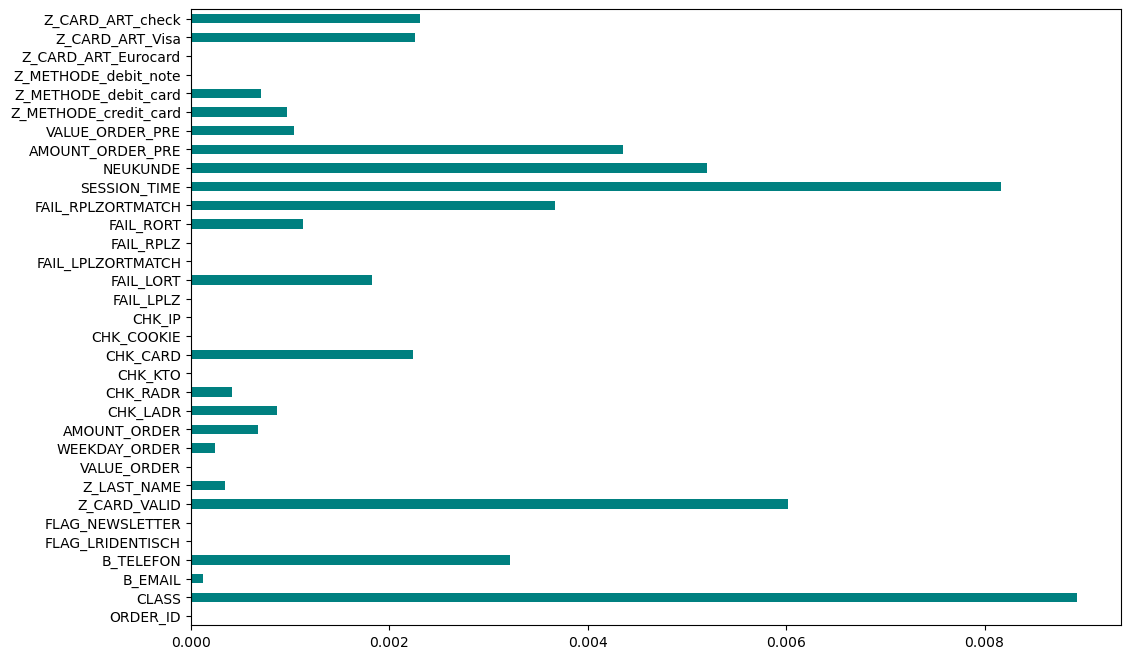

In [237]:
plt.figure(figsize=(12,8))

feature_importance = pd.Series(importance, final_df.columns[0:len(final_df.columns)-1])
feature_importance.plot(kind='barh', color='teal')
plt.show()

### Split train and test data

In [75]:
X = final_df.drop('CLASS', axis=1)
y = final_df['CLASS']

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [77]:
X_train.shape, y_train.shape

((24000, 33), (24000,))

In [78]:
X_test.shape, y_test.shape

((6000, 33), (6000,))

### Feature Selection using ExtraTreesClassifier 

In [231]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train,y_train)

ExtraTreesClassifier()

In [232]:
print(model.feature_importances_)

[0.18033634 0.01793766 0.0090364  0.01376292 0.00416499 0.16196699
 0.00634565 0.17474981 0.09926332 0.04501401 0.0088238  0.00301814
 0.00155039 0.00197719 0.00358772 0.00249051 0.00328943 0.00371044
 0.00351998 0.004974   0.00556834 0.004179   0.14912301 0.0113923
 0.01402064 0.04114062 0.00470772 0.00087783 0.00343084 0.00557211
 0.00646124 0.00323096 0.00077571]


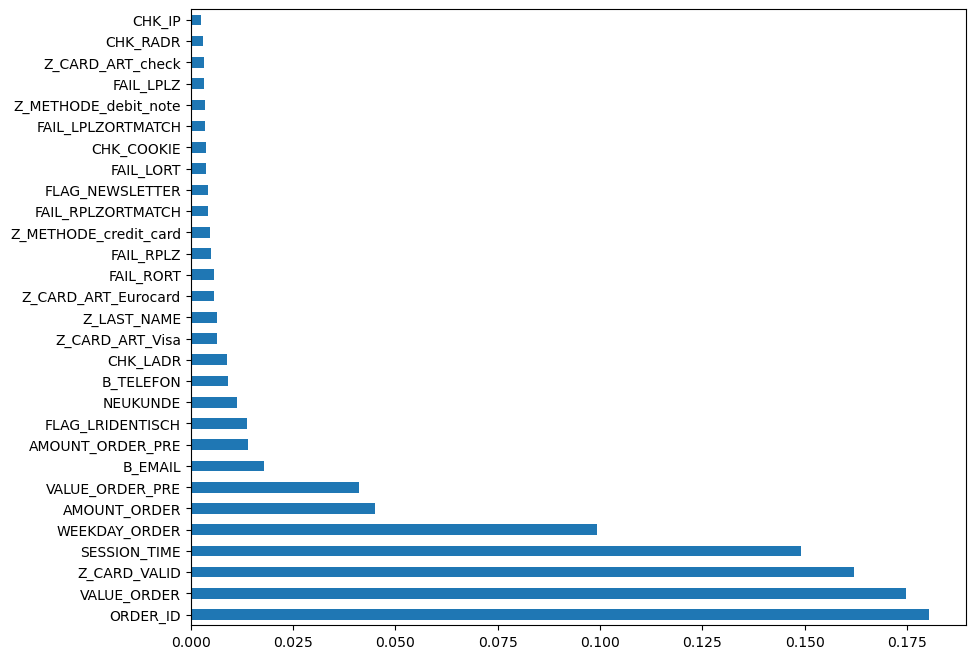

In [234]:
plt.figure(figsize=(10,8))

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(29).plot(kind='barh')
plt.show()

In [238]:
final_df.columns

Index(['ORDER_ID', 'CLASS', 'B_EMAIL', 'B_TELEFON', 'FLAG_LRIDENTISCH',
       'FLAG_NEWSLETTER', 'Z_CARD_VALID', 'Z_LAST_NAME', 'VALUE_ORDER',
       'WEEKDAY_ORDER', 'AMOUNT_ORDER', 'CHK_LADR', 'CHK_RADR', 'CHK_KTO',
       'CHK_CARD', 'CHK_COOKIE', 'CHK_IP', 'FAIL_LPLZ', 'FAIL_LORT',
       'FAIL_LPLZORTMATCH', 'FAIL_RPLZ', 'FAIL_RORT', 'FAIL_RPLZORTMATCH',
       'SESSION_TIME', 'NEUKUNDE', 'AMOUNT_ORDER_PRE', 'VALUE_ORDER_PRE',
       'Z_METHODE_credit_card', 'Z_METHODE_debit_card', 'Z_METHODE_debit_note',
       'Z_CARD_ART_Eurocard', 'Z_CARD_ART_Visa', 'Z_CARD_ART_check',
       'Z_CARD_ART_debit_card'],
      dtype='object')

### Create new_df using only Selected features 

In [79]:
new_df = final_df[['ORDER_ID','B_EMAIL','B_TELEFON','FLAG_LRIDENTISCH','Z_CARD_VALID','WEEKDAY_ORDER','AMOUNT_ORDER','AMOUNT_ORDER_PRE',
                   'VALUE_ORDER_PRE','NEUKUNDE','VALUE_ORDER','SESSION_TIME','CLASS']]

In [80]:
new_df.shape

(30000, 13)

In [81]:
new_df.head()

,ORDER_ID,B_EMAIL,B_TELEFON,FLAG_LRIDENTISCH,Z_CARD_VALID,WEEKDAY_ORDER,AMOUNT_ORDER,AMOUNT_ORDER_PRE,VALUE_ORDER_PRE,NEUKUNDE,VALUE_ORDER,SESSION_TIME,CLASS
0,49917,1,0,1,5.2006,2,1,0,0.00,1,17.80,8,no
1,49919,1,1,0,12.2007,6,1,0,0.00,1,18.20,13,no
2,49923,1,0,1,12.2007,0,1,0,0.00,1,10.80,3,no
3,49924,0,1,1,1.2007,0,1,4,75.72,0,54.50,11,no
4,49927,1,1,1,12.2006,5,1,0,0.00,1,19.99,16,no


In [82]:
X = new_df.drop('CLASS', axis=1)
y = new_df['CLASS']

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [84]:
X_train.head()

,ORDER_ID,B_EMAIL,B_TELEFON,FLAG_LRIDENTISCH,Z_CARD_VALID,WEEKDAY_ORDER,AMOUNT_ORDER,AMOUNT_ORDER_PRE,VALUE_ORDER_PRE,NEUKUNDE,VALUE_ORDER,SESSION_TIME
3225,40897,1,0,1,4.2007,6,2,0,0.00,1,83.80,20
11815,26449,1,0,1,11.2007,3,4,2,169.58,0,108.69,8
7338,34130,1,0,1,11.2006,6,1,1,104.52,0,46.50,5
14980,21248,1,1,0,1.2005,4,1,0,0.00,1,31.90,3
27167,1137,1,0,1,11.2007,3,1,0,0.00,1,18.20,7


In [85]:
X_train.shape, y_train.shape

((24000, 12), (24000,))

In [86]:
X_test.shape, y_test.shape

((6000, 12), (6000,))

### Feature Scaling

In [419]:
## robust scaler
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train2 = scaler.fit_transform(X_train)
X_test2 = scaler.transform(X_test)

In [179]:
#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train2 = sc.fit_transform(X_train)
X_test2 = sc.transform(X_test)

In [317]:
# #Fix the imbalanced Classes
# from imblearn.over_sampling import SMOTE
# smt=SMOTE(random_state=100)
# X_train_smt,y_train_smt = smt.fit_resample(X_train,y_train)

### Apply models


### Decision Tree

In [91]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[5247  422]
 [ 284   47]]
              precision    recall  f1-score   support

          no       0.95      0.93      0.94      5669
         yes       0.10      0.14      0.12       331

    accuracy                           0.88      6000
   macro avg       0.52      0.53      0.53      6000
weighted avg       0.90      0.88      0.89      6000



In [92]:
print('accuracy_score: ',accuracy_score(y_test,y_pred))
print('recall_score: ', recall_score(y_test,y_pred, average='macro'))
print('precision_score: ', precision_score(y_test,y_pred, average='macro'))

accuracy_score:  0.8823333333333333
recall_score:  0.5337770106035954
precision_score:  0.5244331330407909


Observation: the decision tree gives 88% accuracy. on class label no it performs good but on class label yes it performs worst.
Our aim is to reduce Flase Nagative and Flase positive

### Random Forest

In [93]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [94]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[5665    4]
 [ 330    1]]
              precision    recall  f1-score   support

          no       0.94      1.00      0.97      5669
         yes       0.20      0.00      0.01       331

    accuracy                           0.94      6000
   macro avg       0.57      0.50      0.49      6000
weighted avg       0.90      0.94      0.92      6000



Observation: the random forest gives 94% accuracy. on class label no it performs good but on class label yes it performs worst. 
the model predict yes as no as we have more records of no in dataset.

In [95]:
print('accuracy_score: ',accuracy_score(y_test,y_pred))
print('recall_score: ', recall_score(y_test,y_pred, average='macro'))
print('precision_score: ', precision_score(y_test,y_pred, average='macro'))

accuracy_score:  0.9443333333333334
recall_score:  0.5011577781105594
precision_score:  0.5724770642201835


### Final model - RandomForestClassifier

In [191]:
rf_1 = RandomForestClassifier(n_estimators=100, class_weight='balanced', max_depth=10,
                             min_samples_split=10, min_samples_leaf=5, max_features='sqrt')

# Fit the model on the training data
rf_1.fit(X_train, y_train)

# Predict the class labels for the test data
y_pred = rf_1.predict(X_test)

In [192]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[4847  822]
 [ 211  120]]
              precision    recall  f1-score   support

          no       0.96      0.86      0.90      5669
         yes       0.13      0.36      0.19       331

    accuracy                           0.83      6000
   macro avg       0.54      0.61      0.55      6000
weighted avg       0.91      0.83      0.86      6000



In [205]:
rf_1 = RandomForestClassifier(n_estimators=100, class_weight='balanced', max_depth=10,
                             min_samples_split=10, min_samples_leaf=5, max_features='sqrt')

# Fit the model on the training data
rf_1.fit(X_train, y_train)

# Predict the class labels for the test data
y_pred = rf_1.predict(X_test)

In [206]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[4846  823]
 [ 209  122]]
              precision    recall  f1-score   support

          no       0.96      0.85      0.90      5669
         yes       0.13      0.37      0.19       331

    accuracy                           0.83      6000
   macro avg       0.54      0.61      0.55      6000
weighted avg       0.91      0.83      0.86      6000



This model performs good compared to other models. it predict 122 correct out of 331. it reduce Flase positive and False negative.

### Oversampling

In [207]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

os = RandomOverSampler()
X_train_ns, y_train_ns = os.fit_resample(X_train, y_train)

print('The number of samples in each class before fit {}'.format(Counter(y_train)))
print('The number of samples in each class after fit {}'.format(Counter(y_train_ns)))

The number of samples in each class before fit Counter({'no': 22585, 'yes': 1415})
The number of samples in each class after fit Counter({'no': 22585, 'yes': 22585})


In [208]:
rf_1 = RandomForestClassifier(n_estimators=100, class_weight='balanced', max_depth=10,
                             min_samples_split=10, min_samples_leaf=5, max_features='sqrt')

# Fit the model on the training data
rf_1.fit(X_train_ns, y_train_ns)

# Predict the class labels for the test data
y_pred = rf_1.predict(X_test)

In [209]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[4666 1003]
 [ 191  140]]
              precision    recall  f1-score   support

          no       0.96      0.82      0.89      5669
         yes       0.12      0.42      0.19       331

    accuracy                           0.80      6000
   macro avg       0.54      0.62      0.54      6000
weighted avg       0.91      0.80      0.85      6000



### Logistic Regression

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [111]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [112]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[5669    0]
 [ 331    0]]
              precision    recall  f1-score   support

          no       0.94      1.00      0.97      5669
         yes       0.00      0.00      0.00       331

    accuracy                           0.94      6000
   macro avg       0.47      0.50      0.49      6000
weighted avg       0.89      0.94      0.92      6000



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [113]:
log_reg = LogisticRegression()
grid= {'C':10.0**np.arange(-2,3),'penalty':['l1','l2']}
cv = KFold(n_splits=5, random_state=None, shuffle=False)

In [114]:
clf = GridSearchCV(log_reg, grid,cv=cv, n_jobs=-1, scoring='f1_macro')

In [115]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Valu

## Import Test data

In [123]:
# import test data
test_data = pd.read_csv('risk_test_data.csv')
test_data.head()

,ORDER_ID,B_EMAIL,B_TELEFON,B_BIRTHDATE,FLAG_LRIDENTISCH,FLAG_NEWSLETTER,Z_METHODE,Z_CARD_ART,Z_CARD_VALID,Z_LAST_NAME,...,FAIL_RPLZ,FAIL_RORT,FAIL_RPLZORTMATCH,SESSION_TIME,NEUKUNDE,AMOUNT_ORDER_PRE,VALUE_ORDER_PRE,DATE_LORDER,MAHN_AKT,MAHN_HOECHST
0,49916,yes,no,7/22/1979,no,no,credit_card,Visa,2.2005,yes,...,no,no,no,6,yes,0,0.00,?,?,?
1,49918,no,no,2/5/1973,no,no,credit_card,Eurocard,4.2005,yes,...,no,no,no,9,no,1,30.31,9/2/2004,0,0
2,49920,yes,no,7/19/1970,yes,no,check,?,8.2005,?,...,yes,no,no,5,yes,0,0.00,?,?,?
3,49921,yes,no,4/9/1985,yes,no,credit_card,Eurocard,7.2006,yes,...,no,no,no,13,no,1,54.07,12/24/2003,0,1
4,49922,no,yes,4/7/1963,no,no,debit_note,?,5.2007,yes,...,yes,no,no,8,yes,0,0.00,?,?,?


In [124]:
test_data.head()

,ORDER_ID,B_EMAIL,B_TELEFON,B_BIRTHDATE,FLAG_LRIDENTISCH,FLAG_NEWSLETTER,Z_METHODE,Z_CARD_ART,Z_CARD_VALID,Z_LAST_NAME,...,FAIL_RPLZ,FAIL_RORT,FAIL_RPLZORTMATCH,SESSION_TIME,NEUKUNDE,AMOUNT_ORDER_PRE,VALUE_ORDER_PRE,DATE_LORDER,MAHN_AKT,MAHN_HOECHST
0,49916,yes,no,7/22/1979,no,no,credit_card,Visa,2.2005,yes,...,no,no,no,6,yes,0,0.00,?,?,?
1,49918,no,no,2/5/1973,no,no,credit_card,Eurocard,4.2005,yes,...,no,no,no,9,no,1,30.31,9/2/2004,0,0
2,49920,yes,no,7/19/1970,yes,no,check,?,8.2005,?,...,yes,no,no,5,yes,0,0.00,?,?,?
3,49921,yes,no,4/9/1985,yes,no,credit_card,Eurocard,7.2006,yes,...,no,no,no,13,no,1,54.07,12/24/2003,0,1
4,49922,no,yes,4/7/1963,no,no,debit_note,?,5.2007,yes,...,yes,no,no,8,yes,0,0.00,?,?,?


In [125]:
# replace '?' with np.nan
df = test_data.replace('?',np.NAN) 
df.head()

,ORDER_ID,B_EMAIL,B_TELEFON,B_BIRTHDATE,FLAG_LRIDENTISCH,FLAG_NEWSLETTER,Z_METHODE,Z_CARD_ART,Z_CARD_VALID,Z_LAST_NAME,...,FAIL_RPLZ,FAIL_RORT,FAIL_RPLZORTMATCH,SESSION_TIME,NEUKUNDE,AMOUNT_ORDER_PRE,VALUE_ORDER_PRE,DATE_LORDER,MAHN_AKT,MAHN_HOECHST
0,49916,yes,no,7/22/1979,no,no,credit_card,Visa,2.2005,yes,...,no,no,no,6,yes,0,0.00,NaN,NaN,NaN
1,49918,no,no,2/5/1973,no,no,credit_card,Eurocard,4.2005,yes,...,no,no,no,9,no,1,30.31,9/2/2004,0,0
2,49920,yes,no,7/19/1970,yes,no,check,NaN,8.2005,NaN,...,yes,no,no,5,yes,0,0.00,NaN,NaN,NaN
3,49921,yes,no,4/9/1985,yes,no,credit_card,Eurocard,7.2006,yes,...,no,no,no,13,no,1,54.07,12/24/2003,0,1
4,49922,no,yes,4/7/1963,no,no,debit_note,NaN,5.2007,yes,...,yes,no,no,8,yes,0,0.00,NaN,NaN,NaN


In [126]:
final_df = df.drop(df.iloc[:,15:25], axis=1)
final_df.head()

,ORDER_ID,B_EMAIL,B_TELEFON,B_BIRTHDATE,FLAG_LRIDENTISCH,FLAG_NEWSLETTER,Z_METHODE,Z_CARD_ART,Z_CARD_VALID,Z_LAST_NAME,...,FAIL_RPLZ,FAIL_RORT,FAIL_RPLZORTMATCH,SESSION_TIME,NEUKUNDE,AMOUNT_ORDER_PRE,VALUE_ORDER_PRE,DATE_LORDER,MAHN_AKT,MAHN_HOECHST
0,49916,yes,no,7/22/1979,no,no,credit_card,Visa,2.2005,yes,...,no,no,no,6,yes,0,0.00,NaN,NaN,NaN
1,49918,no,no,2/5/1973,no,no,credit_card,Eurocard,4.2005,yes,...,no,no,no,9,no,1,30.31,9/2/2004,0,0
2,49920,yes,no,7/19/1970,yes,no,check,NaN,8.2005,NaN,...,yes,no,no,5,yes,0,0.00,NaN,NaN,NaN
3,49921,yes,no,4/9/1985,yes,no,credit_card,Eurocard,7.2006,yes,...,no,no,no,13,no,1,54.07,12/24/2003,0,1
4,49922,no,yes,4/7/1963,no,no,debit_note,NaN,5.2007,yes,...,yes,no,no,8,yes,0,0.00,NaN,NaN,NaN


In [127]:
final_df = final_df.drop(['DATE_LORDER','MAHN_AKT','MAHN_HOECHST','B_BIRTHDATE','TIME_ORDER'], axis=1 )
final_df.head()

,ORDER_ID,B_EMAIL,B_TELEFON,FLAG_LRIDENTISCH,FLAG_NEWSLETTER,Z_METHODE,Z_CARD_ART,Z_CARD_VALID,Z_LAST_NAME,VALUE_ORDER,...,FAIL_LPLZ,FAIL_LORT,FAIL_LPLZORTMATCH,FAIL_RPLZ,FAIL_RORT,FAIL_RPLZORTMATCH,SESSION_TIME,NEUKUNDE,AMOUNT_ORDER_PRE,VALUE_ORDER_PRE
0,49916,yes,no,no,no,credit_card,Visa,2.2005,yes,64.5,...,no,no,no,no,no,no,6,yes,0,0.00
1,49918,no,no,no,no,credit_card,Eurocard,4.2005,yes,74.3,...,no,no,no,no,no,no,9,no,1,30.31
2,49920,yes,no,yes,no,check,NaN,8.2005,NaN,42.8,...,no,no,no,yes,no,no,5,yes,0,0.00
3,49921,yes,no,yes,no,credit_card,Eurocard,7.2006,yes,42.8,...,no,no,no,no,no,no,13,no,1,54.07
4,49922,no,yes,no,no,debit_note,NaN,5.2007,yes,6.5,...,no,no,no,yes,no,no,8,yes,0,0.00


In [128]:
final_df.isnull().sum()

ORDER_ID                 0
B_EMAIL                  0
B_TELEFON                0
FLAG_LRIDENTISCH         0
FLAG_NEWSLETTER          0
Z_METHODE                0
Z_CARD_ART           12317
Z_CARD_VALID             0
Z_LAST_NAME           9706
VALUE_ORDER              0
WEEKDAY_ORDER            0
AMOUNT_ORDER             0
ANUMMER_01               0
CHK_RADR                 0
CHK_KTO                  0
CHK_CARD                 0
CHK_COOKIE               0
CHK_IP                   0
FAIL_LPLZ                0
FAIL_LORT                0
FAIL_LPLZORTMATCH        0
FAIL_RPLZ                0
FAIL_RORT                0
FAIL_RPLZORTMATCH        0
SESSION_TIME             0
NEUKUNDE                 0
AMOUNT_ORDER_PRE         0
VALUE_ORDER_PRE          0
dtype: int64

In [129]:
final_df.loc[final_df['Z_METHODE'] == 'check', 'Z_CARD_ART'] = final_df.loc[final_df['Z_METHODE'] == 'check', 'Z_CARD_ART'].fillna('check')

In [130]:
final_df['Z_CARD_ART'] = final_df['Z_CARD_ART'].fillna('Eurocard')

In [131]:
final_df['Z_CARD_ART'].isnull().sum()

0

In [132]:
### fill missing  value using mode
final_df['Z_LAST_NAME'] = final_df['Z_LAST_NAME'].fillna(final_df['Z_LAST_NAME'].mode()[0])

In [133]:
final_df['B_EMAIL'] = final_df['B_EMAIL'].map({'yes':1, 'no':0})

In [134]:
final_df['B_TELEFON'] = final_df['B_TELEFON'].map({'yes':1, 'no':0})

In [135]:
final_df['FLAG_LRIDENTISCH'] = final_df['FLAG_LRIDENTISCH'].map({'yes':1, 'no':0})

In [136]:
final_df['FLAG_NEWSLETTER'] = final_df['FLAG_NEWSLETTER'].map({'yes':1, 'no':0})

In [137]:
final_df['FAIL_LPLZ'] = final_df['FAIL_LPLZ'].map({'yes':1, 'no':0})

In [138]:
final_df['FAIL_LORT'] = final_df['FAIL_LORT'].map({'yes':1, 'no':0})

In [139]:
final_df['FAIL_LPLZORTMATCH'] = final_df['FAIL_LPLZORTMATCH'].map({'yes':1, 'no':0})

In [140]:
final_df['FAIL_RPLZ'] = final_df['FAIL_RPLZ'].map({'yes':1, 'no':0})

In [141]:
final_df['FAIL_RORT'] = final_df['FAIL_RORT'].map({'yes':1, 'no':0})

In [142]:
final_df['FAIL_RPLZORTMATCH'] = final_df['FAIL_RPLZORTMATCH'].map({'yes':1, 'no':0})

In [143]:
final_df['NEUKUNDE'] = final_df['NEUKUNDE'].map({'yes':1, 'no':0})

In [144]:
final_df['Z_LAST_NAME'] = final_df['Z_LAST_NAME'].map({'yes':1, 'no':0})

In [145]:
final_df['CHK_RADR'] = final_df['CHK_RADR'].map({'yes':1, 'no':0})

In [146]:
final_df['CHK_CARD'] = final_df['CHK_CARD'].map({'yes':1, 'no':0})

In [147]:
final_df['CHK_COOKIE'] = final_df['CHK_COOKIE'].map({'yes':1, 'no':0})

In [148]:
final_df['CHK_IP'] = final_df['CHK_IP'].map({'yes':1, 'no':0})

In [149]:
final_df['CHK_KTO'] = final_df['CHK_KTO'].map({'yes':1, 'no':0})

In [150]:
categorical_data = [features for features in final_df.columns if final_df[features].dtypes == 'O']
categorical_data

['Z_METHODE', 'Z_CARD_ART', 'WEEKDAY_ORDER']

In [151]:
final_df['WEEKDAY_ORDER'] = lb.transform(final_df['WEEKDAY_ORDER'])

In [152]:
test_df = final_df[['ORDER_ID','B_EMAIL','B_TELEFON','FLAG_LRIDENTISCH','Z_CARD_VALID','WEEKDAY_ORDER','AMOUNT_ORDER','AMOUNT_ORDER_PRE',
                   'VALUE_ORDER_PRE','NEUKUNDE','VALUE_ORDER','SESSION_TIME']]

In [153]:
test_df

,ORDER_ID,B_EMAIL,B_TELEFON,FLAG_LRIDENTISCH,Z_CARD_VALID,WEEKDAY_ORDER,AMOUNT_ORDER,AMOUNT_ORDER_PRE,VALUE_ORDER_PRE,NEUKUNDE,VALUE_ORDER,SESSION_TIME
0,49916,1,0,0,2.2005,2,1,0,0.00,1,64.5,6
1,49918,0,0,0,4.2005,2,4,1,30.31,0,74.3,9
2,49920,1,0,1,8.2005,3,1,0,0.00,1,42.8,5
3,49921,1,0,1,7.2006,2,1,1,54.07,0,42.8,13
4,49922,0,1,0,5.2007,6,1,0,0.00,1,6.5,8
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,49820,1,0,1,7.2005,3,1,1,80.99,0,32.8,17
19996,49822,1,0,0,3.2007,2,1,0,0.00,1,34.5,9
19997,49823,1,0,0,10.2007,1,1,0,0.00,1,9.8,9
19998,49826,1,0,0,5.2005,2,3,0,0.00,0,130.0,12


Apply model

In [154]:
y_pred = rf.predict(test_df)

In [155]:
y_pred

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [210]:
pred_y = rf_1.predict(test_df)

In [211]:
pred_y

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [212]:
column_name=['CLASS']

In [213]:
df = pd.DataFrame(pred_y, columns= column_name)
df.head()

,CLASS
0,no
1,no
2,no
3,no
4,no


In [214]:
df.shape

(20000, 1)

In [215]:
test = test_df.drop(test_df.iloc[:,1:], axis=1)

In [216]:
test.head()

,ORDER_ID
0,49916
1,49918
2,49920
3,49921
4,49922


In [217]:
testdata = pd.concat([test,df ], axis=1)

In [218]:
testdata.head()

,ORDER_ID,CLASS
0,49916,no
1,49918,no
2,49920,no
3,49921,no
4,49922,no


In [219]:
testdata.shape

(20000, 2)

In [220]:
testdata['CLASS'].value_counts()

no     16269
yes     3731
Name: CLASS, dtype: int64

### Conclusion

Out of all models Random Forest model perform good. other models get good accuracy but they are predicts well on low risk but predict worst on high risk. Randome Forest is not much affected by class imbalanced. still more improvement is needed in order to reduce Flase Nagetive and Flase Positive.

It is still okay if model predict low risk as high risk but it is good if model predict high risk as low risk. 